In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from datetime import datetime
sb.set() # set the default Seaborn style for graphics
sb.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline


In this notebook, we will be doing EDA on the articles.csv file. First, we explore the dataset by looking the dataset's dimensions, checking out the types of unique variables per category and their total count. This helps us to determine how we should approach to analyze the dataset further down the data pipeline.

# Articles - Exploratory Data Analysis


In [2]:
articlesdata = pd.read_csv('./articles.csv')
pd.options.display.max_columns = None
articlesdata.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [3]:
articlesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

article_id : **Unique identifier of each article.** \
product_code, prod_name : **Unique identifier of every product (more specific) and its name.**

product_type, product_type_name : **The general type of clothing each article belongs to**\
graphical_appearance_no, graphical_appearance_name : **The type of print on article**\
colour_group_code, colour_group_name : **The general colour of the clothing article**\
perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : **Additional color information**

department_no, department_name : **Unique identifier of every department and its name**\
index_code, index_name : **Unique identifier of the category the garment falls under and its name**\
index_group_no, index_group_name : **Unique identifier of every generic category the garment falls under and its name**\
section_no, section_name : **A unique identifier of every section where the article can be found and its name**\
garment_group_no, garment_group_name : **A unique attribute of every garment and its name**\
detail_desc : **Short description of the product**

### Break down of each categorical variable

In [4]:
print(articlesdata['index_group_name'].value_counts())
print("------------------------------------------------")
print(articlesdata['index_name'].value_counts())
print("------------------------------------------------")
print(articlesdata['garment_group_name'].value_counts())
print("------------------------------------------------")
print(articlesdata['product_group_name'].value_counts())
print("------------------------------------------------")
print(articlesdata['product_type_name'].value_counts())
print("------------------------------------------------")

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64
------------------------------------------------
Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64
------------------------------------------------
Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses

**Most popular attributes for each Categorical variable**

In [5]:
articlesCatData = pd.DataFrame(articlesdata[['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name','department_name','index_code', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']])
articlesCatData.head()

articlesCatData['prod_name'] = articlesCatData['prod_name'].astype('category')
articlesCatData['product_type_name'] = articlesCatData['product_type_name'].astype('category')
articlesCatData['product_group_name'] = articlesCatData['product_group_name'].astype('category')
articlesCatData['graphical_appearance_name'] = articlesCatData['graphical_appearance_name'].astype('category')
articlesCatData['colour_group_name'] = articlesCatData['colour_group_name'].astype('category')
articlesCatData['perceived_colour_value_name'] = articlesCatData['perceived_colour_value_name'].astype('category')
articlesCatData['department_name'] = articlesCatData['department_name'].astype('category')
articlesCatData['index_code'] = articlesCatData['index_code'].astype('category')
articlesCatData['index_name'] = articlesCatData['index_name'].astype('category')
articlesCatData['index_group_name'] = articlesCatData['index_group_name'].astype('category')
articlesCatData['section_name'] = articlesCatData['section_name'].astype('category')
articlesCatData['garment_group_name'] = articlesCatData['garment_group_name'].astype('category')

articlesCatData.describe()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_code,index_name,index_group_name,section_name,garment_group_name
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542
unique,45875,131,19,30,50,8,20,250,10,10,5,56,21
top,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,A,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy
freq,98,11169,42741,49747,22670,42706,22585,4604,26001,26001,39737,7295,21445


In [6]:
for col in articlesdata.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articlesdata[col].nunique()
        print(f'number of unique {col}: {un_n}')

number of unique prod_name: 45875
number of unique product_type_name: 131
number of unique product_group_name: 19
number of unique graphical_appearance_name: 30
number of unique colour_group_name: 50
number of unique perceived_colour_value_name: 8
number of unique perceived_colour_master_name: 20
number of unique department_name: 250
number of unique index_name: 10
number of unique index_group_name: 5
number of unique section_name: 56
number of unique garment_group_name: 21
number of unique detail_desc: 43404


We see the close relationship between index_group_name and index_name, as well as between product_group_name and product_type_name. 

We will be focusing on using index_group_name and product_group_name more in the future as it succinctly categorizes the articles into a reasonable range of categories that we can work with.

In [7]:
# articlesdata['index_name'] = articlesdata.Categorical(df['index_name'], 'Down')
articlesdata.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

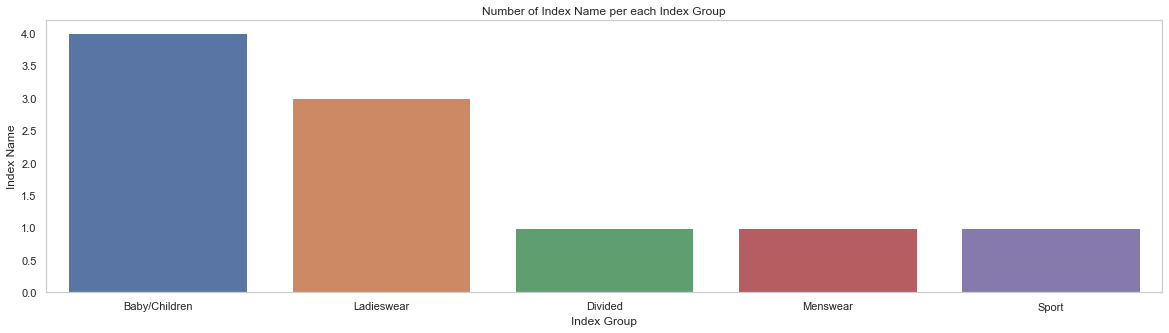

In [8]:
temp = articlesdata.groupby(["index_group_name"])["index_name"].nunique()
df = pd.DataFrame({'Index Group': temp.index,
                   'Index Name': temp.values
                  })
df = df.sort_values(['Index Name'], ascending=False)
plt.figure(figsize = (20,5))
plt.title('Number of Index Name per each Index Group')
s = sb.barplot(x = 'Index Group', y="Index Name", data=df)
# s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()

plt.show()



Most clothing pieces per Index Group - (Baby/children the most popular article category, followed by Ladieswear)

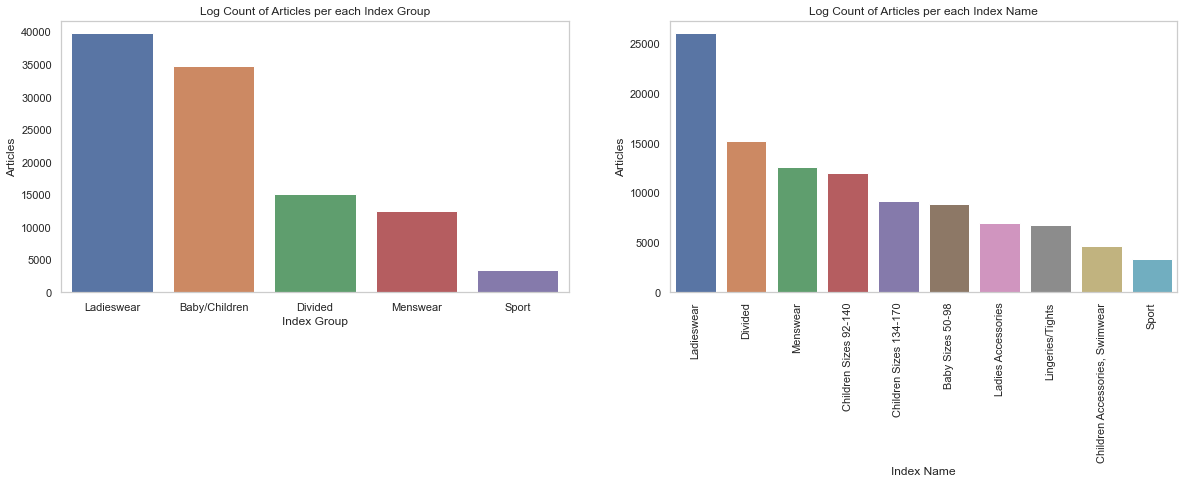

In [9]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

temp1 = articlesdata.groupby(["index_group_name"])["article_id"].nunique()
df1 = pd.DataFrame({'Index Group': temp1.index,
                   'Articles': temp1.values
                  })
df1 = df1.sort_values(['Articles'], ascending=False)
# plt.figure(figsize = (20,5))
# plt.title('Log Count of Articles per each Index Group')
s1 = sb.barplot(x = 'Index Group', y="Articles", data=df1, ax=ax[0]).set(title = 'Log Count of Articles per each Index Group')

temp2 = articlesdata.groupby(["index_name"])["article_id"].nunique()
df2 = pd.DataFrame({'Index Name': temp2.index,
                   'Articles': temp2.values
                  })
df2 = df2.sort_values(['Articles'], ascending=False)
s2 = sb.barplot(x = 'Index Name', y="Articles", data=df2, ax=ax[1])
s2.set(title = 'Log Count of Articles per each Index Name')
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [10]:
pd.DataFrame(articlesdata.groupby(['index_group_name', 'index_name']).count()['article_id'])

article_id
index_group_name index_name                                
Baby/Children    Baby Sizes 50-98                      8875
                 Children Accessories, Swimwear        4615
                 Children Sizes 134-170                9214
                 Children Sizes 92-140                12007
Divided          Divided                              15149
Ladieswear       Ladies Accessories                    6961
                 Ladieswear                           26001
                 Lingeries/Tights                      6775
Menswear         Menswear                             12553
Sport            Sport                                 3392

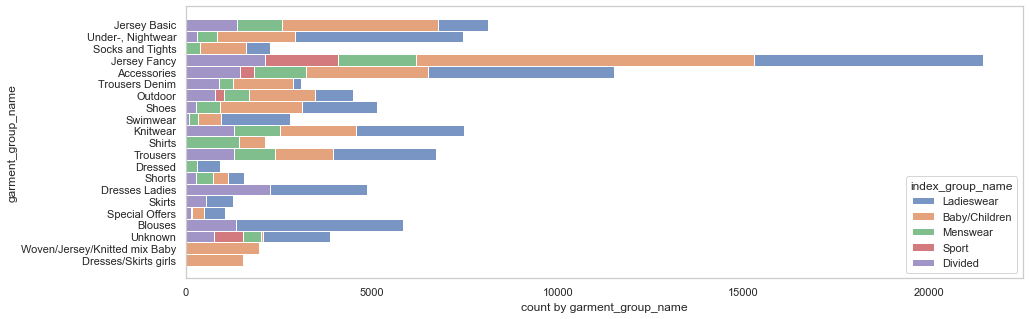

In [11]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sb.histplot(data=articlesdata, y='garment_group_name', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment_group_name')
ax.set_ylabel('garment_group_name')
plt.show()

In [12]:
pd.options.display.max_rows = None
articlesdata.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

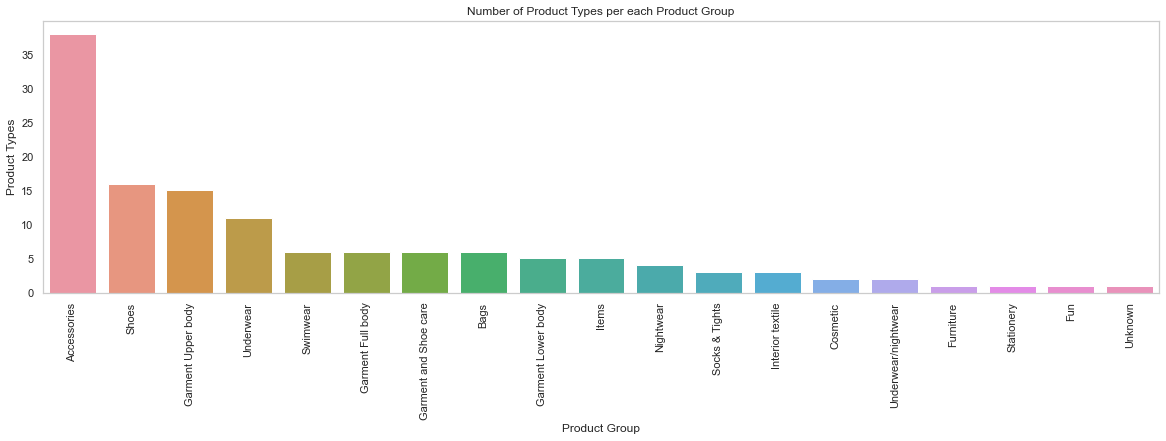

In [13]:
temp = articlesdata.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (20,5))
plt.title('Number of Product Types per each Product Group')
s = sb.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

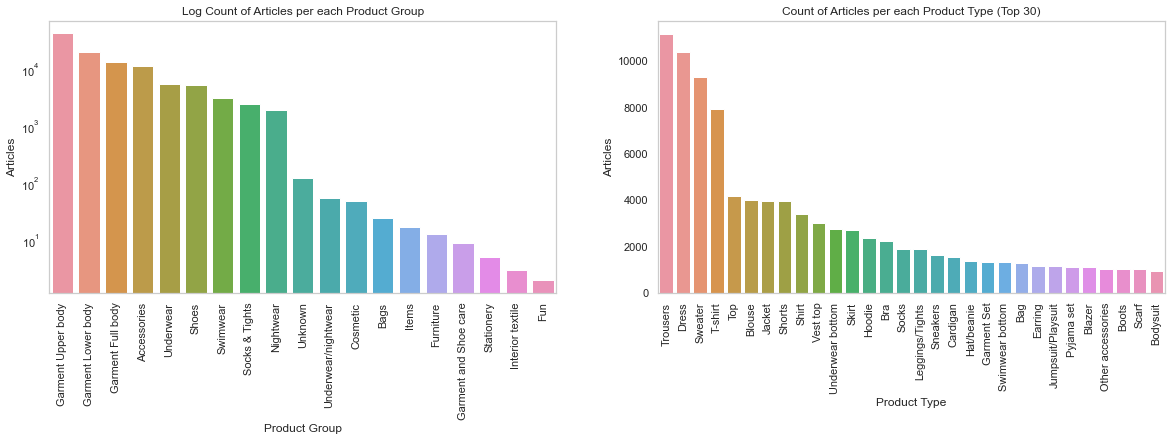

In [14]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

temp1 = articlesdata.groupby(["product_group_name"])["article_id"].nunique()
df1 = pd.DataFrame({'Product Group': temp1.index,
                   'Articles': temp1.values
                  })
df1 = df1.sort_values(['Articles'], ascending=False)
plt.title('Log Count of Articles per each Product Group')
s1 = sb.barplot(x = 'Product Group', y="Articles", data=df1, ax=ax[0])
s1.set_yscale('log')
s1.set(title = 'Log Count of Articles per each Product Group')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

temp2 = articlesdata.groupby(["product_type_name"])["article_id"].nunique()
df2 = pd.DataFrame({'Product Type': temp2.index,
                   'Articles': temp2.values
                  })
df2 = df2.sort_values(['Articles'], ascending=False)[0:30]
s2 = sb.barplot(x = 'Product Type', y="Articles", data=df2, ax=ax[1])
s2.set(title = 'Count of Articles per each Product Type (Top 30)')
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)

locs, labels = plt.xticks()
plt.show()